---
# Pandas Foundation
---


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
movies = pd.read_csv('./movie.csv')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
movies.shape

(4916, 28)

In [6]:
movies.isnull().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        862
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               300
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
dtype: int64

## Dissecting the anatomy of a DataFrame

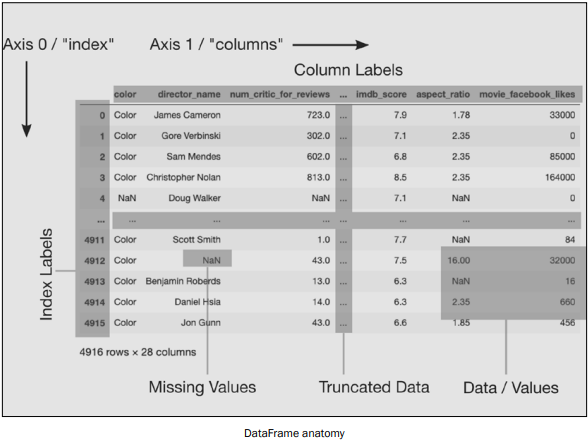

Use the DataFrame attributes index, columns, and values to assign the index, columns, and data to their own variables:

In [7]:
index = movies.index
index

RangeIndex(start=0, stop=4916, step=1)

In [8]:
column = movies.columns
column

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [9]:
data = movies.to_numpy()
data[:5]

array([['Color', 'James Cameron', 723.0, 178.0, 0.0, 855.0,
        'Joel David Moore', 1000.0, 760505847.0,
        'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar',
        886204, 4834, 'Wes Studi', 0.0,
        'avatar|future|marine|native|paraplegic',
        'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', 3054.0,
        'English', 'USA', 'PG-13', 237000000.0, 2009.0, 936.0, 7.9, 1.78,
        33000],
       ['Color', 'Gore Verbinski', 302.0, 169.0, 563.0, 1000.0,
        'Orlando Bloom', 40000.0, 309404152.0,
        'Action|Adventure|Fantasy', 'Johnny Depp',
        "Pirates of the Caribbean: At World's End", 471220, 48350,
        'Jack Davenport', 0.0,
        'goddess|marriage ceremony|marriage proposal|pirate|singapore',
        'http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1', 1238.0,
        'English', 'USA', 'PG-13', 300000000.0, 2007.0, 5000.0, 7.1,
        2.35, 0],
       ['Color', 'Sam Mendes', 602.0, 148.0, 0.0, 161.0, 'Rory Kinnear',
       

Output the Python type of each DataFrame component

In [10]:
type(index)

pandas.core.indexes.range.RangeIndex

In [11]:
type(column)

pandas.core.indexes.base.Index

In [12]:
type(data), data.shape

(numpy.ndarray, (4916, 28))

The index and the columns are closely related. Both of them are subclasses of Index. This allows you to perform similar operations on both the index and the columns:

In [13]:
issubclass(pd.RangeIndex, pd.Index)

True

In [14]:
issubclass(column.__class__, pd.Index)

True

Most of pandas relies heavily on the ndarray. Beneath the index, columns, and
data are NumPy ndarrays. They could be considered the base object for pandas that many
other objects are built upon.

In [15]:
data = movies.values
data

array([['Color', 'James Cameron', 723.0, ..., 7.9, 1.78, 33000],
       ['Color', 'Gore Verbinski', 302.0, ..., 7.1, 2.35, 0],
       ['Color', 'Sam Mendes', 602.0, ..., 6.8, 2.35, 85000],
       ...,
       ['Color', 'Benjamin Roberds', 13.0, ..., 6.3, nan, 16],
       ['Color', 'Daniel Hsia', 14.0, ..., 6.3, 2.35, 660],
       ['Color', 'Jon Gunn', 43.0, ..., 6.6, 1.85, 456]], dtype=object)

In [16]:
data = movies.to_numpy()
data

array([['Color', 'James Cameron', 723.0, ..., 7.9, 1.78, 33000],
       ['Color', 'Gore Verbinski', 302.0, ..., 7.1, 2.35, 0],
       ['Color', 'Sam Mendes', 602.0, ..., 6.8, 2.35, 85000],
       ...,
       ['Color', 'Benjamin Roberds', 13.0, ..., 6.3, nan, 16],
       ['Color', 'Daniel Hsia', 14.0, ..., 6.3, 2.35, 660],
       ['Color', 'Jon Gunn', 43.0, ..., 6.6, 1.85, 456]], dtype=object)

In [17]:
index.to_numpy()

array([   0,    1,    2, ..., 4913, 4914, 4915])

In [18]:
column.to_numpy()

array(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes',
       'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect_ratio', 'movie_facebook_likes'], dtype=object)

---
# Understanding data types
---
We display the data type of each column in a DataFrame. After ingest data, it is crucial to know the type of data held in each column as it fundamentally changes the kind of operations that are possible with it.

**How to do it**:  
Use the `.dtypes` attribute to display each column name along with its data type.

In [19]:
movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

Use the `.value_counts` method to return the counts of each data type

In [20]:
movies.dtypes.value_counts()

float64    13
object     12
int64       3
dtype: int64

Look at the `.info` method

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4916 entries, 0 to 4915
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4897 non-null   object 
 1   director_name              4814 non-null   object 
 2   num_critic_for_reviews     4867 non-null   float64
 3   duration                   4901 non-null   float64
 4   director_facebook_likes    4814 non-null   float64
 5   actor_3_facebook_likes     4893 non-null   float64
 6   actor_2_name               4903 non-null   object 
 7   actor_1_facebook_likes     4909 non-null   float64
 8   gross                      4054 non-null   float64
 9   genres                     4916 non-null   object 
 10  actor_1_name               4909 non-null   object 
 11  movie_title                4916 non-null   object 
 12  num_voted_users            4916 non-null   int64  
 13  cast_total_facebook_likes  4916 non-null   int64

Typically, when a column is of the object data type, it signals that the entire column is strings.When you load CSV files and string columns are missing values, pandas will stick in a NaN (float) for that cell.
So the column might have both object and float (missing) values in it. 
The .dtypes attribute will show the column as an object (or O on the series). It will not show it as a mixed type column (that contains both strings and floats):

In [22]:
mixte = ['Paul', np.nan, 'Eve']
mixte_serie = pd.Series(mixte)
mixte_serie

0    Paul
1     NaN
2     Eve
dtype: object

In [23]:
mixte_serie.dtype

dtype('O')

## Selecting a column
Selected a single column from a DataFrame returns a Series (that has the same index as the
DataFrame).

In [24]:
# Pass a column name as a string to the indexing operator to select a Series 
# of data
movies['director_name']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
4911          Scott Smith
4912                  NaN
4913     Benjamin Roberds
4914          Daniel Hsia
4915             Jon Gunn
Name: director_name, Length: 4916, dtype: object

In [25]:
# Alternatively, may use attribute access to accomplish the same task
movies.director_name

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
4911          Scott Smith
4912                  NaN
4913     Benjamin Roberds
4914          Daniel Hsia
4915             Jon Gunn
Name: director_name, Length: 4916, dtype: object

In [26]:
# We can also index off of the .loc and .iloc attributes to pull out a Series. 
# The former allows us to pull out by column name, while the latter by position.
movies.loc[:, ['director_name']]

,director_name
0,James Cameron
1,Gore Verbinski
2,Sam Mendes
3,Christopher Nolan
4,Doug Walker
...,...
4911,Scott Smith
4912,NaN
4913,Benjamin Roberds
4914,Daniel Hsia


In [27]:
movies.iloc[:, [1]]

,director_name
0,James Cameron
1,Gore Verbinski
2,Sam Mendes
3,Christopher Nolan
4,Doug Walker
...,...
4911,Scott Smith
4912,NaN
4913,Benjamin Roberds
4914,Daniel Hsia


In [28]:
s1 = movies.loc[:, 'director_name']
s1

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4             Doug Walker
              ...        
4911          Scott Smith
4912                  NaN
4913     Benjamin Roberds
4914          Daniel Hsia
4915             Jon Gunn
Name: director_name, Length: 4916, dtype: object

In [29]:
# Serie index
s1.index

RangeIndex(start=0, stop=4916, step=1)

In [30]:
# data type
s1.dtype

dtype('O')

In [31]:
# length
s1.size

4916

In [32]:
# name
s1.name

'director_name'

In [33]:
# Verify that the output is a Series
type(s1)

pandas.core.series.Series

Note that even though the type is reported as object, because there are missing values, the Series has both floats and strings in it.

In [34]:
s1.apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

## Calling Series methods
Both Series and DataFrames have a tremendous amount of power. We can use the built-in
dir function to uncover all the attributes and methods of a Series. In the following code, we
also show the number of attributes and methods common to both Series and DataFrames.
Both of these objects share the vast majority of attribute and method names

In [35]:
s_attribute_mth = set(dir(pd.Series))
print('Series attribute methods:', len(s_attribute_mth))

Series attribute methods: 425


In [36]:
df_attribute_mth = set(dir(pd.DataFrame))
print('Dataframe attribute methods:', len(df_attribute_mth))

Dataframe attribute methods: 427


In [37]:
common = s_attribute_mth & df_attribute_mth
print('Common methods btw Series and Dataframes: ', len(common))

Common methods btw Series and Dataframes:  372


In [38]:
# Select two Series with different data types
director = movies['director_name']
fb_likes = movies['actor_1_facebook_likes']

In [39]:
print(director.dtype)
print(fb_likes.dtype)

object
float64


In [40]:
# View some of the director serie data
director.sample(n=30, random_state=0)

3327              Will Gluck
1013              Doug Liman
3561        Patrick Stettner
1708          Laurent Tirard
873             Karyn Kusama
1332        Francis Lawrence
3989        Alfred Hitchcock
304          Martin Scorsese
601               Gary Shore
1826    Richard Attenborough
3233            Danny Leiner
405        Steven Soderbergh
1259           Roger Michell
716             F. Gary Gray
3994          Richard Brooks
130          Kenneth Branagh
4271         Morgan Spurlock
4052            Paolo Monico
3429              Ethan Coen
2478            Trent Cooper
1706          Andrew Dominik
3391              Jeta Amata
861                Paul King
4620         Patrick Creadon
1091             Jesse Dylan
1581          Steve Oedekerk
1702             Steve Boyum
1109            Harold Ramis
3948         Justin Kerrigan
3675          Barry Levinson
Name: director_name, dtype: object

In [41]:
# View some of the fb likes serie data
fb_likes.sample(n=30, random_state=0)


3327    15000.0
1013     6000.0
3561      944.0
1708      295.0
873      9000.0
1332    21000.0
3989       18.0
304     29000.0
601      3000.0
1826      385.0
3233      982.0
405     14000.0
1259      293.0
716     26000.0
3994      556.0
130     26000.0
4271    16000.0
4052     1000.0
3429      816.0
2478      690.0
1706    11000.0
3391      262.0
861       838.0
4620      196.0
1091    14000.0
1581      531.0
1702    17000.0
1109      905.0
3948      798.0
3675      801.0
Name: actor_1_facebook_likes, dtype: float64

The data type of the Series usually determines which of the methods will be the most
useful. For instance, one of the most useful methods for the *object* data type Series
is `.value_counts`, which calculates the frequencies

In [42]:
director.value_counts()

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        16
                    ..
Richard J. Lewis     1
Kief Davidson        1
Derrick Borte        1
Maria Maggenti       1
Gabe Ibáñez          1
Name: director_name, Length: 2397, dtype: int64

In [43]:
director.value_counts(normalize=True)

Steven Spielberg    0.005401
Woody Allen         0.004570
Martin Scorsese     0.004155
Clint Eastwood      0.004155
Ridley Scott        0.003324
                      ...   
Richard J. Lewis    0.000208
Kief Davidson       0.000208
Derrick Borte       0.000208
Maria Maggenti      0.000208
Gabe Ibáñez         0.000208
Name: director_name, Length: 2397, dtype: float64

The `.value_counts` method is typically more useful for Series with object data
types but can occasionally provide insight into numeric Series as well. Used with fb_
likes, it appears that higher numbers have been rounded to the nearest thousand
as it is unlikely that so many movies received exactly 1,000 likes

In [44]:
fb_likes.value_counts()

1000.0     436
11000.0    206
2000.0     189
3000.0     150
12000.0    131
          ... 
362.0        1
216.0        1
859.0        1
225.0        1
334.0        1
Name: actor_1_facebook_likes, Length: 877, dtype: int64

Counting the number of elements in the Series may be done with the `.size` or `.shape` attribute or the built-in `len` function. 
The `.unique` method will return a NumPy array with the unique values

In [45]:
director.size

4916

In [46]:
director.shape[0]

4916

In [47]:
len(director)

4916

In [48]:
director.unique()

array(['James Cameron', 'Gore Verbinski', 'Sam Mendes', ...,
       'Scott Smith', 'Benjamin Roberds', 'Daniel Hsia'], dtype=object)

Additionally, there is the `.count` method, which doesn't return the count of items, but the number of non-missing values

In [49]:
director.count()

4814

Basic summary statistics are provided with `.min`, `.max`, `.mean`, 
`.median`, and `.std`:

In [50]:
fb_likes.min()

0.0

In [51]:
fb_likes.max()

640000.0

In [52]:
fb_likes.mean()

6494.488490527602

In [53]:
fb_likes.median()

982.0

In [54]:
fb_likes.std()

15106.986883848309

may use the `.describe` method to return both the summary
statistics and a few of the quantiles at once. When `.describe` is used with an object data type column, a completely different output is returned

In [55]:
fb_likes.describe()

count      4909.000000
mean       6494.488491
std       15106.986884
min           0.000000
25%         607.000000
50%         982.000000
75%       11000.000000
max      640000.000000
Name: actor_1_facebook_likes, dtype: float64

In [56]:
director.describe()

count                 4814
unique                2397
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

The `.quantile` method calculates the quantile of numeric data. Note that if you
pass in a **scaler**, you will get **scalar** output, but if you pass in a **list**, the output is
a **pandas Series**:

In [57]:
fb_likes.quantile(.25)

607.0

In [58]:
brn = [.25, .5, .75, .95]
fb_likes_brn = fb_likes.quantile(brn)
fb_likes_brn

0.25      607.0
0.50      982.0
0.75    11000.0
0.95    23000.0
Name: actor_1_facebook_likes, dtype: float64

In [59]:
type(fb_likes_brn)

pandas.core.series.Series

## Missing values

In [60]:
fb_likes.isnull().sum()

7

In [61]:
director.isnull().sum()

102

In [62]:
# hasnans
director.hasnans

True

In [63]:
director.isna().sum()

102

In [64]:
director.isnull().sum()

102

In [65]:
director.notna().sum()

4814

## Series operations

In [66]:
imdb_score = movies['imdb_score']
part_imdb = imdb_score.sample(n=30, random_state=0)
part_imdb

3327    7.1
1013    6.8
3561    6.4
1708    7.2
873     5.5
1332    6.9
3989    6.7
304     8.2
601     6.3
1826    7.4
3233    7.1
405     6.9
1259    6.5
716     7.0
3994    7.9
130     7.0
4271    6.6
4052    5.1
3429    7.0
2478    3.1
1706    7.5
3391    5.6
861     7.2
4620    7.4
1091    5.6
1581    6.3
1702    4.0
1109    6.0
3948    7.1
3675    7.2
Name: imdb_score, dtype: float64

In [67]:
part_imdb += 1

In [68]:
part_imdb

3327    8.1
1013    7.8
3561    7.4
1708    8.2
873     6.5
1332    7.9
3989    7.7
304     9.2
601     7.3
1826    8.4
3233    8.1
405     7.9
1259    7.5
716     8.0
3994    8.9
130     8.0
4271    7.6
4052    6.1
3429    8.0
2478    4.1
1706    8.5
3391    6.6
861     8.2
4620    8.4
1091    6.6
1581    7.3
1702    5.0
1109    7.0
3948    8.1
3675    8.2
Name: imdb_score, dtype: float64

In [69]:
part_imdb *= 2
part_imdb

3327    16.2
1013    15.6
3561    14.8
1708    16.4
873     13.0
1332    15.8
3989    15.4
304     18.4
601     14.6
1826    16.8
3233    16.2
405     15.8
1259    15.0
716     16.0
3994    17.8
130     16.0
4271    15.2
4052    12.2
3429    16.0
2478     8.2
1706    17.0
3391    13.2
861     16.4
4620    16.8
1091    13.2
1581    14.6
1702    10.0
1109    14.0
3948    16.2
3675    16.4
Name: imdb_score, dtype: float64

In [70]:
part_imdb /= 1.5
part_imdb

3327    10.800000
1013    10.400000
3561     9.866667
1708    10.933333
873      8.666667
1332    10.533333
3989    10.266667
304     12.266667
601      9.733333
1826    11.200000
3233    10.800000
405     10.533333
1259    10.000000
716     10.666667
3994    11.866667
130     10.666667
4271    10.133333
4052     8.133333
3429    10.666667
2478     5.466667
1706    11.333333
3391     8.800000
861     10.933333
4620    11.200000
1091     8.800000
1581     9.733333
1702     6.666667
1109     9.333333
3948    10.800000
3675    10.933333
Name: imdb_score, dtype: float64

In [71]:
np.sort(part_imdb[part_imdb > 10])

array([10.13333333, 10.26666667, 10.4       , 10.53333333, 10.53333333,
       10.66666667, 10.66666667, 10.66666667, 10.8       , 10.8       ,
       10.8       , 10.93333333, 10.93333333, 10.93333333, 11.2       ,
       11.2       , 11.33333333, 11.86666667, 12.26666667])

In [72]:
director[director=='James Cameron']

0       James Cameron
26      James Cameron
285     James Cameron
288     James Cameron
599     James Cameron
2455    James Cameron
3508    James Cameron
Name: director_name, dtype: object

In [73]:
director[director=='James Cameron'].count()

7

###  Table of operators and the corresponding methods
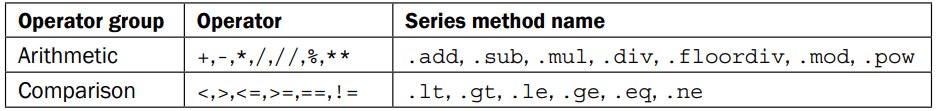

## Chaining Series Methods

In [75]:
director.value_counts().head(3)

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Name: director_name, dtype: int64

A common way to count the number of missing values is to chain the `.sum` method after a call to `.isna`

In [76]:
fb_likes.isna().sum()

7

In [77]:
fb_likes.dtype

dtype('float64')

In [78]:
(fb_likes.fillna(0).astype('int').head())

0     1000
1    40000
2    11000
3    27000
4      131
Name: actor_1_facebook_likes, dtype: int64

## Debugging chains with `.pipe`

In [79]:
def debug_ser(ser):
  '''print out the value of the intermediate result'''
  print('BEFORE')
  print(ser)
  print('AFTER')
  return ser

In [80]:
(fb_likes.fillna(0).pipe(debug_ser).astype(int).head())

BEFORE
0        1000.0
1       40000.0
2       11000.0
3       27000.0
4         131.0
         ...   
4911      637.0
4912      841.0
4913        0.0
4914      946.0
4915       86.0
Name: actor_1_facebook_likes, Length: 4916, dtype: float64
AFTER


0     1000
1    40000
2    11000
3    27000
4      131
Name: actor_1_facebook_likes, dtype: int64

## Renaming column names

In [81]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [83]:
# Create dict that map the old column names
col_map = {'director_name': 'director', 'num_critic_for_reviews': 'critic_reviews'}
# rename method to rename cols
movies.rename(columns=col_map, inplace=False).head(3)

,color,director,critic_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


You can also rename the index using
the `.rename` method if you want to. This makes more sense if the columns are string values.
So we will set the index to the *movie_title* column and then map those values to new ones

In [84]:
idx_map = {
    'Avatar': 'Ravata',
    "Spectre": "Ertceps",
    "Pirates of the Caribbean: At World's End": "POC",
}

col_map = {
    "aspect_ratio": "aspect",
    "movie_facebook_likes": "fblikes",
}

(
    movies.set_index('movie_title')
    .rename(columns=col_map, index=idx_map, inplace=False)
    .head(3)
)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect,fblikes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ravata,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
POC,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Ertceps,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [87]:
movies = pd.read_csv('./movie.csv', index_col='movie_title')
movies.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [88]:
ids = movies.index.to_list()
ids[:5]

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'Star Wars: Episode VII - The Force Awakens']

In [89]:
columns = movies.columns.to_list()
columns[:5]

['color',
 'director_name',
 'num_critic_for_reviews',
 'duration',
 'director_facebook_likes']

In [90]:
# rename the row and column labels with list assignments
ids[0] = "Ratava"
ids[1] = "POC"
ids[2] = "Ertceps"
columns[1] = "director"
columns[-2] = "aspect"
columns[-1] = "fblikes"

movies.index = ids
movies.columns = columns
movies.head(3)

,color,director,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect,fblikes
Ratava,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
POC,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Ertceps,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


Another option is to pass a function into the `.rename` method. The function takes a column
name and returns a new name. Assuming there are spaces and uppercases in the columns,
this code will clean them up:

In [91]:
def to_clean(val):
  return val.strip().lower().replace(' ', '_')

In [92]:
movies.rename(columns=to_clean).head(3)

,color,director,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect,fblikes
Ratava,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
POC,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Ertceps,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


We can also use Comprehensions list to clean columns:

In [94]:
cols = [col.strip().lower().replace(' ', '_') for col in movies.columns]
movies.columns = cols
movies.head(3)

,color,director,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect,fblikes
Ratava,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
POC,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Ertceps,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


## Creating and Deleting columns
We create new columns in the movie dataset by using the `.assign` method
and then delete columns with the `.drop` method.

One way to create a new column is to do an index assignment:

In [95]:
movies['has_seen'] = 0
movies.head(3)

,color,director,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect,fblikes,has_seen
Ratava,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0
POC,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0
Ertceps,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0


chaining methods is very often, so we prefer to use the `.assign` method instead index assignment. 

In [97]:
# .assign return new df
(
    movies.rename(index=idx_map, columns=col_map)
    .assign(has_seen=0)
    .head(3)
)

,color,director,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect,fblikes,has_seen
Ratava,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0
POC,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0
Ertceps,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0


There are several columns that contain data on the number of Facebook likes. Let's
add up all actor and director Facebook like columns and assign them to the *total_likes* column

In [98]:
movies.columns

Index(['color', 'director', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect', 'fblikes', 'has_seen'],
      dtype='object')

In [100]:
likes_col = ['director_facebook_likes', 'actor_3_facebook_likes', 
             'actor_1_facebook_likes', 'actor_2_facebook_likes',
             'cast_total_facebook_likes'
             ]
sum_likes = movies[likes_col].sum(axis=1)
sum_likes.head()

Ratava                                          7625.0
POC                                            94913.0
Ertceps                                        23254.0
The Dark Knight Rises                         201759.0
Star Wars: Episode VII - The Force Awakens       417.0
dtype: float64

In [101]:
# Another method
def sum_likes(df):
  return df[[col for col in df if 'like' in col]].sum(axis=1)

In [102]:
movies.assign(total_likes=sum_likes).head()

,color,director,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect,fblikes,has_seen,total_likes
Ratava,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,40625.0
POC,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,94913.0
Ertceps,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0,108254.0
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,365759.0
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0,417.0


Let's check if there are any missing values in *total_likes* column

In [108]:
(
    movies.assign(total_likes=sum_likes)
    .total_likes
    .isna()
    .sum()
)

0

In [110]:
likes_col = ['director_facebook_likes', 'actor_3_facebook_likes', 
             'actor_1_facebook_likes', 'actor_2_facebook_likes',
             ]
sum_likes = movies[likes_col].sum(axis=1)
movies = movies.assign(total_likes=sum_likes)

In [111]:
def cast_like_gt_actor(df):
  return movies.cast_total_facebook_likes >= movies.total_likes

In [114]:
total = (
    movies.director_facebook_likes 
    + movies.actor_1_facebook_likes
    + movies.actor_2_facebook_likes
    +movies.actor_3_facebook_likes
)

df2 = movies.assign(
    total_likes=total, 
    is_cast_likes_more= cast_like_gt_actor,
    )

In [116]:
df2.head()

,color,director,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect,fblikes,has_seen,total_likes,is_cast_likes_more
Ratava,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,0,2791.0,True
POC,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,0,46563.0,True
Ertceps,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,0,11554.0,True
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,0,95000.0,True
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,0,NaN,False


In [115]:
df2.is_cast_likes_more.all()

False

In [118]:
df2.drop(columns='total_likes', inplace=True)

Let's recreate a Series of just the total actor likes:

In [119]:
actor_sum = movies[likes_col[1:]].sum(axis=1)

In [120]:
actor_sum.head(3)

Ratava      2791.0
POC        46000.0
Ertceps    11554.0
dtype: float64

In [121]:
movies.cast_total_facebook_likes >= actor_sum

Ratava                                        True
POC                                           True
Ertceps                                       True
The Dark Knight Rises                         True
Star Wars: Episode VII - The Force Awakens    True
                                              ... 
Signed Sealed Delivered                       True
The Following                                 True
A Plague So Pleasant                          True
Shanghai Calling                              True
My Date with Drew                             True
Length: 4916, dtype: bool

In [123]:
movies.cast_total_facebook_likes.ge(actor_sum).all()

True

Finally, let's calculate the percentage of the *cast_total_facebook_likes* that *come from actor_sum*

In [126]:
pct_like = actor_sum.div(movies.cast_total_facebook_likes).mul(100)
pct_like

Ratava                                         57.736864
POC                                            95.139607
Ertceps                                        98.752137
The Dark Knight Rises                          68.378310
Star Wars: Episode VII - The Force Awakens    100.000000
                                                 ...    
Signed Sealed Delivered                        62.417871
The Following                                 100.000000
A Plague So Pleasant                                 NaN
Shanghai Calling                               90.276614
My Date with Drew                              76.687117
Length: 4916, dtype: float64

Let's validate that the minimum and maximum of this Series fall between 0 and 1

In [127]:
pct_like.describe()

count    4883.000000
mean       83.327889
std        14.056578
min        30.076696
25%        73.528368
50%        86.928884
75%        95.477440
max       100.000000
dtype: float64

We can then create a Series using the *movie_title* column as the index. The Series constructor lets us pass in both the values and an index:

In [132]:
pd.Series(pct_like.values, index=movies.index).head()


Ratava                                         57.736864
POC                                            95.139607
Ertceps                                        98.752137
The Dark Knight Rises                          68.378310
Star Wars: Episode VII - The Force Awakens    100.000000
dtype: float64

In [129]:
movies.columns

Index(['color', 'director', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'aspect', 'fblikes', 'has_seen', 'total_likes'],
      dtype='object')

In [133]:
profit_index = movies.columns.get_loc('gross') + 1
profit_index

9

In [134]:
movies.insert(loc=profit_index,
              column='profit',
              value=movies['gross'] - movies['budget'])